<h1><strong>Exploratory Data Analysis (EDA)</strong></h1>
<p><strong>Author:</strong> Seungmi Kim</p>
<p><strong>Date:</strong> December 10, 2024</p>
<p>This EDA is performed as part of the AI Nanodegree Program's Connect Session led by Eslam Abdelghany for the AWS AI/ML Scholarship. The objectives of this document are to explore, clean, and analyze shared bike data while applying various data analysis techniques and methodologies.</p>

<h2><strong>Introduction</strong></h2>
<p>
    This report presents a comprehensive analysis of shared bike usage data to uncover actionable insights and provide strategic recommendations. The primary goal is to understand user behavior, usage patterns, and operational trends to inform data-driven decisions regarding pricing strategy, user engagement, and operational efficiency. The report is structured into the following key sections:
</p>
<ul>
    <li><strong>Exploratory Data Analysis:</strong> We investigate the dataset's structure, size, and completeness, identifying key trends and patterns in user demographics and trip behavior.</li>
    <li><strong>Descriptive Analysis:</strong> We explore average trip durations, age distributions, and user type proportions to identify usage characteristics.</li>
    <li><strong>Location Analysis:</strong> We analyze the most and least popular stations, frequent routes, and station clusters to understand location-based trends and operational hotspots.</li>
    <li><strong>Temporal Analysis:</strong> We investigate temporal trends, including peak usage hours, trip duration variations by time of day, and seasonal patterns, to identify demand fluctuations.</li>
    <li><strong>User Insights:</strong> We analyze user demographics, including gender distribution, age group preferences, and trip duration variations by user type, to understand key user segments.</li>
    <li><strong>Advanced Insights:</strong> We delve into advanced topics such as subscriber behavior, average trip distances, correlations between variables, and trip duration outliers to derive deeper operational insights.</li>
    <li><strong>Visualization Tasks:</strong> We create visualizations to present key findings, including bar charts, scatter plots, and histograms, to communicate data effectively.</li>
    <li><strong>Actionable Recommendations:</strong> Based on the insights derived, we propose targeted strategies to optimize pricing, improve user experience, and enhance operational efficiency.</li>
</ul>
<p>
    By integrating descriptive statistics, visualizations, and advanced analysis, this report aims to provide a systematic understanding of shared bike usage and offer actionable insights to support strategic decision-making.
</p>

In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
file_path = "/content/drive/MyDrive/Colab Notebooks/201902-fordgobike-tripdata.csv"
df = pd.read_csv(file_path)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<h2><strong>1. Data Exploration and Cleaning</strong></h2>
<ul>
    <li>Determine the size and structure of the dataset using <code>.shape</code> and <code>.info()</code>:
        <ul>
            <li>The dataset contains 183,412 records and 16 columns, with data types including integers, floats, and objects (strings). The total memory usage is approximately 22.4 MB.</li>
        </ul>
    </li>
    <li>Identify missing values in the dataset with <code>.isnull().sum()</code>:
        <ul>
            <li>Columns <code>start_station_id</code> and <code>start_station_name</code> have 197 missing values each.</li>
            <li>Columns <code>end_station_id</code> and <code>end_station_name</code> also have 197 missing values each.</li>
            <li>Columns <code>member_birth_year</code> and <code>member_gender</code> have 8,265 missing values each.</li>
            <li>Key columns such as <code>duration_sec</code>, <code>start_time</code>, <code>end_time</code>, <code>latitude</code>, <code>longitude</code>, <code>bike_id</code>, and <code>user_type</code> are complete with no missing values.</li>
        </ul>
    </li>
    <li>List unique categories in <code>user_type</code> and <code>member_gender</code> using <code>.unique()</code>:
        <ul>
            <li>The <code>user_type</code> column contains two categories: <strong>Customer</strong> and <strong>Subscriber</strong>.</li>
            <li>The <code>member_gender</code> column contains four categories: <strong>Male</strong>, <strong>Female</strong>, <strong>Other</strong>, and <strong>NaN</strong> (missing values).</li>
        </ul>
    </li>
</ul>

In [13]:
# Size and structure of the dataset
df_shape = df.shape
print("The shape of the dataset is:", df_shape)
print("\nThe structure of the dataset is:")
df.info()

# Missing values in the dataset
df_missing = df.isnull().sum()
print("\nThe missing values in the dataset are:")
print(df_missing)

# Unique categories in user_type and member_gender
user_types = df['user_type'].unique()
print("\nThe unique categories in 'user_type' are:")
print(user_types)
member_genders = df['member_gender'].unique()
print("\nThe unique categories in 'member_gender' are:")
print(member_genders)

The shape of the dataset is: (183412, 16)

The structure of the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-nu

<h2><strong>2. Descriptive Analysis</strong></h2>
<ul>
    <li>
        Calculate the average trip duration using <code>.mean()</code> on <code>duration_sec</code>:
        <ul>
            <li>The average trip duration is approximately 726.08 seconds, which is equivalent to 12.1 minutes.</li>
        </ul>
    </li>
    <li>
        Analyze the age distribution of riders by deriving age from <code>member_birth_year</code> and visualizing with a histogram:
        <ul>
            <li>The age distribution shows that most riders are in their 30s or 40s, with a clear peak around 35 years old. The histogram also highlights some outliers, likely due to data inconsistencies in the <code>member_birth_year</code> field.</li>
        </ul>
    </li>
    <li>
        Compute the proportion of subscribers versus customers by grouping on <code>user_type</code>:
        <ul>
            <li>Subscribers account for 89.17% of the users, while customers make up 10.83% of the user base.</li>
        </ul>
    </li>
</ul>


The average trip duration is: 726.078435434977 seconds.
The average trip duration is: 12.1 minutes.


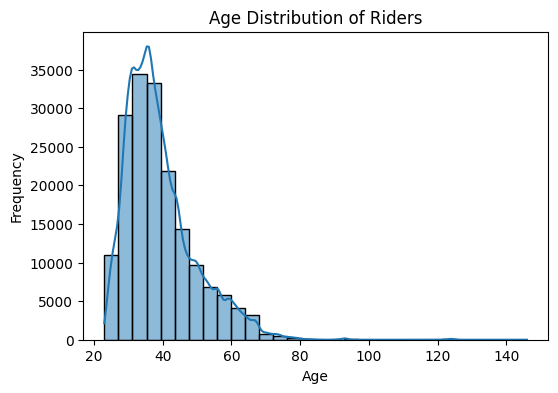


The percentage of users: Subscribers vs Customers:
user_type
Subscriber    89.167557
Customer      10.832443
Name: proportion, dtype: float64


In [43]:
# Average trip duration
average_trip_duration_seconds = df['duration_sec'].mean()
average_trip_duration_minutes = average_trip_duration_seconds / 60
print("The average trip duration is:", average_trip_duration_seconds, "seconds.")
print("The average trip duration is:", round(average_trip_duration_minutes, 2), "minutes.")

# Age distribution
current_year = datetime.now().year
df['age'] = current_year - df['member_birth_year']
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Riders')
plt.show()

# Percentage of users: Subscribers vs Customers
user_type_proportions = df['user_type'].value_counts(normalize=True) * 100
print("\nThe percentage of users: Subscribers vs Customers:")
print(user_type_proportions)


<h2><strong>3. Location Analysis</strong></h2>
<ul>
    <li>Identify the most and least popular start stations using <code>.value_counts()</code> on <code>start_station_name</code>:
        <ul>
            <li>Most popular start stations are:
                <ul>
                    <li><strong>Market St at 10th St:</strong> 3,904 trips</li>
                    <li><strong>San Francisco Caltrain Station 2 (Townsend St at 4th St):</strong> 3,544 trips</li>
                    <li><strong>Berry St at 4th St:</strong> 3,052 trips</li>
                    <li><strong>Montgomery St BART Station (Market St at 2nd St):</strong> 2,895 trips</li>
                    <li><strong>Powell St BART Station (Market St at 4th St):</strong> 2,760 trips</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Find the top 5 most frequent routes by combining <code>start_station_name</code> and <code>end_station_name</code> into a route column:
        <ul>
            <li><strong>Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza):</strong> 337 trips</li>
            <li><strong>San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St:</strong> 314 trips</li>
            <li><strong>Grand Ave at Perkins St to 19th Street BART Station:</strong> 310 trips</li>
            <li><strong>The Embarcadero at Sansome St to Steuart St at Market St:</strong> 285 trips</li>
            <li><strong>19th Street BART Station to Grand Ave at Perkins St:</strong> 284 trips</li>
        </ul>
    </li>
    <li>Visualize station clusters on a map using latitude and longitude in a scatter plot:
        <ul>
            <li>Station clusters are displayed on the map below, highlighting key areas of activity based on latitude and longitude:</li>
        </ul>
    </li>
</ul>


Most popular start stations are:
 start_station_name
Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
Name: count, dtype: int64 

Top 5 most frequent routes are:
 route
Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)               337
San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St    314
Grand Ave at Perkins St to 19th Street BART Station                                    310
The Embarcadero at Sansome St to Steuart St at Market St                               285
19th Street BART Station to Grand Ave at Perkins St                                    284
Name: count, dtype: int64 



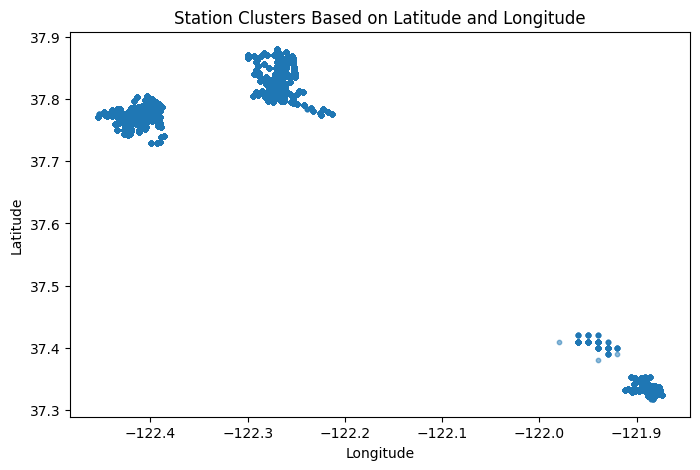

In [24]:
# Most and least popular start stations
popular_start_stations = df['start_station_name'].value_counts()
print("Most popular start stations are:\n", popular_start_stations.head(), "\n")

# Top 5 most frequent routes
df['route'] = df['start_station_name'] + " to " + df['end_station_name']
top_routes = df['route'].value_counts().head(5)
print("Top 5 most frequent routes are:\n", top_routes, "\n")

# Scatter plot of stations based on latitude and longitude
plt.figure(figsize=(8, 5))
plt.scatter(df['start_station_longitude'], df['start_station_latitude'], alpha=0.5, s=10)
plt.title('Station Clusters Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<h2><strong>4. Temporal Analysis</strong></h2>
<ul>
    <li>
        Determine peak hours for starting trips by extracting the hour from <code>start_time</code> and plotting a bar chart:
        <ul>
            <li>The peak hours for starting trips are 8 AM and 5 PM, as shown in the bar chart below. These times likely coincide with typical commuting hours.</li>
        </ul>
    </li>
    <li>
        Analyze how trip durations vary by time of day (morning, afternoon, evening, night):
        <ul>
            <li>Average trip durations by time of day:
                <ul>
                    <li><strong>Afternoon:</strong> 822 seconds (13.70 minutes)</li>
                    <li><strong>Evening:</strong> 695 seconds (11.58 minutes)</li>
                    <li><strong>Morning:</strong> 679 seconds (11.31 minutes)</li>
                    <li><strong>Night:</strong> 750 seconds (12.50 minutes)</li>
                </ul>
            </li>
            <li>Afternoon trips tend to have the longest average durations, while evening and morning trips are shorter on average.</li>
        </ul>
    </li>
    <li>
        Investigate seasonal patterns in trips, if <code>start_date</code> is available, by grouping by month and plotting trip counts:
        <ul>
            <li>All recorded trips occurred in February, as shown in the monthly trip count bar chart below, indicating that the dataset represents a single month of data.</li>
        </ul>
    </li>
</ul>


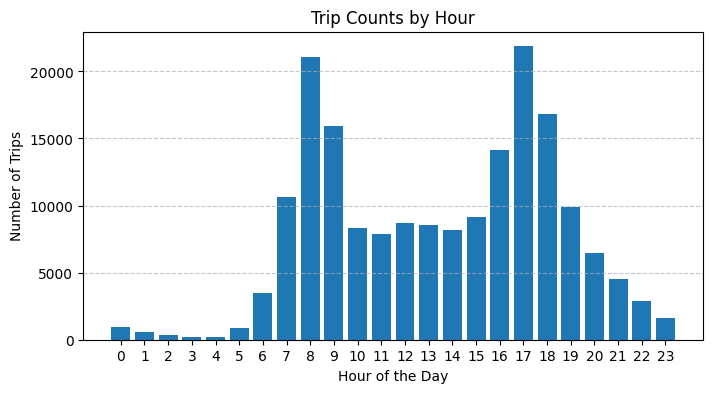

Average trip durations by time of day in second: time_of_day
Afternoon    821.981218
Evening      694.814364
Morning      678.736049
Night        750.044616
Name: duration_sec, dtype: float64
Average trip durations by time of day in minute: time_of_day
Afternoon    13.70
Evening      11.58
Morning      11.31
Night        12.50
Name: duration_sec, dtype: float64


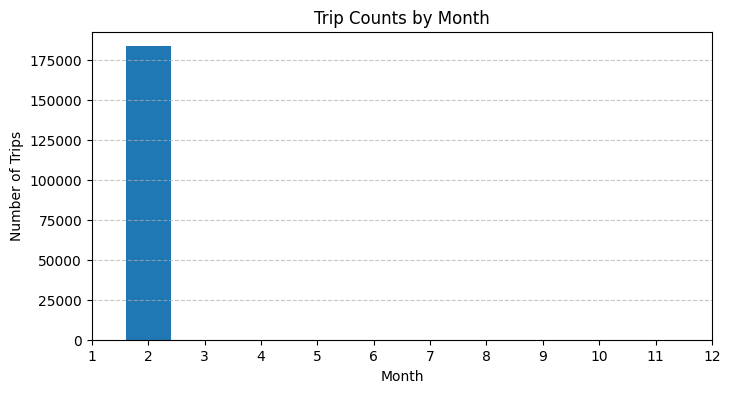

In [44]:
# Extract the hour from start_time
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

# Plot a bar chart of trip counts per hour
hourly_trip_counts = df['start_hour'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.bar(hourly_trip_counts.index, hourly_trip_counts.values)
plt.title('Trip Counts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Define time of day bins
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['time_of_day'] = df['start_hour'].apply(categorize_time_of_day)

# Analyze trip durations by time of day
time_of_day_durations_seconds = df.groupby('time_of_day')['duration_sec'].mean()
time_of_day_durations_minutes = time_of_day_durations_seconds / 60
print("Average trip durations by time of day in second:", time_of_day_durations_seconds)
print("Average trip durations by time of day in minute:", round(time_of_day_durations_minutes, 2))

# Extract the month from start_time
df['start_month'] = pd.to_datetime(df['start_time']).dt.month

# Plot trip counts by month
monthly_trip_counts = df['start_month'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.bar(monthly_trip_counts.index, monthly_trip_counts.values)
plt.title('Trip Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2><strong>5. User Insights</strong></h2>
<ul>
    <li>Visualize the gender distribution of riders using a pie or bar chart:
        <ul>
            <li>The gender distribution is predominantly male (74.6%), followed by female riders (23.3%) and other (2.1%). The pie chart below provides a visual representation, including the absolute numbers for each category.</li>
        </ul>
    </li>
    <li>Examine how trip duration varies by <code>user_type</code> and <code>member_gender</code> using <code>.groupby()</code>:
        <ul>
            <li>Average trip duration by user type and gender:
                <ul>
                    <li><strong>Customer (Female):</strong> 1423 seconds</li>
                    <li><strong>Customer (Male):</strong> 1253 seconds</li>
                    <li><strong>Customer (Other):</strong> 1589 seconds</li>
                    <li><strong>Subscriber (Female):</strong> 696 seconds</li>
                    <li><strong>Subscriber (Male):</strong> 616 seconds</li>
                    <li><strong>Subscriber (Other):</strong> 912 seconds</li>
                </ul>
            </li>
            <li>Customers, particularly those identifying as "Other," tend to have longer trip durations on average compared to subscribers.</li>
        </ul>
    </li>
    <li>Identify the age group with the highest trip frequency by creating age bins (e.g., 18–25, 26–35, etc.):
        <ul>
            <li>The 26–35 age group has the highest trip frequency, with over 70,000 trips, followed by the age group of 36–45. The bar chart below displays the trip frequencies across age groups.</li>
        </ul>
    </li>
</ul>


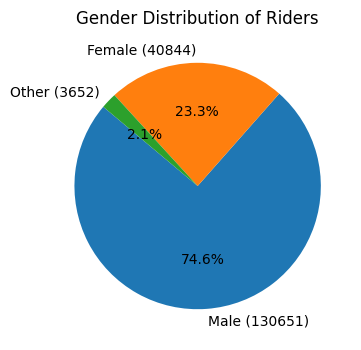

Average trip duration by user type and gender:
user_type   member_gender
Customer    Female           1422.958037
            Male             1253.473588
            Other            1589.125275
Subscriber  Female            696.407575
            Male              616.424086
            Other             912.174539
Name: duration_sec, dtype: float64


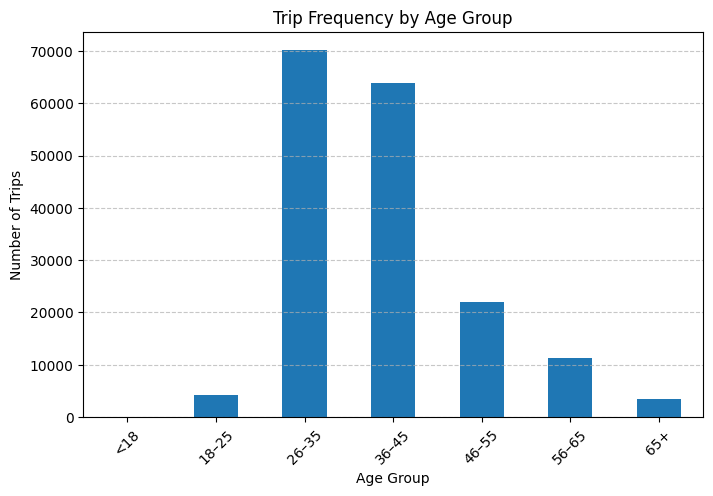

In [47]:
# Gender distribution
gender_counts = df['member_gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(
    gender_counts,
    labels=[f"{label} ({count})" for label, count in zip(gender_counts.index, gender_counts)],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Gender Distribution of Riders')
plt.show()

# Trip duration by user type and gender
duration_by_user_gender = df.groupby(['user_type', 'member_gender'])['duration_sec'].mean()
print("Average trip duration by user type and gender:")
print(duration_by_user_gender)

# Age group with the highest trip frequency
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
age_group_counts = df['age_group'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar')
plt.title('Trip Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h2><strong>6. Advanced Insights</strong></h2>
<ul>
    <li>Analyze if subscribers are more likely to use bike share for all trips by grouping on <code>user_type</code> and examining <code>bike_share_for_all_trip</code>:
        <ul>
            <li>Subscribers are more likely to use bike share for all trips compared to customers. Among subscribers, 10.61% indicated "Yes" for bike share usage for all trips, while 89.39% indicated "No." On the other hand, 100% of customers indicated "No."</li>
        </ul>
    </li>
    <li>Calculate the average distance between start and end stations using the haversine formula with latitude and longitude:
        <ul>
            <li>The average distance between start and end stations is approximately 1.69 km.</li>
        </ul>
    </li>
    <li>Explore correlations between age, trip duration, and user type using <code>.corr()</code> and visualize with a heatmap:
        <ul>
            <li>The correlation matrix indicates weak correlations between the variables. Notably, there is a slight negative correlation (-0.14) between trip duration and user type (subscriber vs. customer).</li>
        </ul>
    </li>
    <li>Identify outliers in <code>duration_sec</code> using boxplots:
        <ul>
            <li>The boxplot shows significant outliers in the trip duration data, with some trips exceeding 80,000 seconds (approximately 22 hours), which might indicate erroneous or extreme values.</li>
        </ul>
    </li>
</ul>


Percentage of users using bike share for all trips by user type:
user_type   bike_share_for_all_trip
Customer    No                         100.000000
Subscriber  No                          89.385731
            Yes                         10.614269
Name: proportion, dtype: float64

The average distance between start and end stations is: 1.6907 km


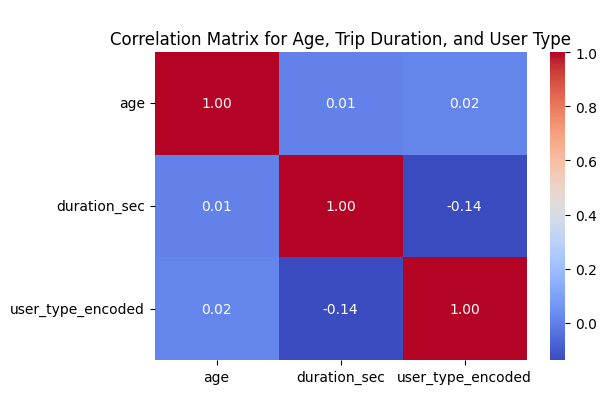

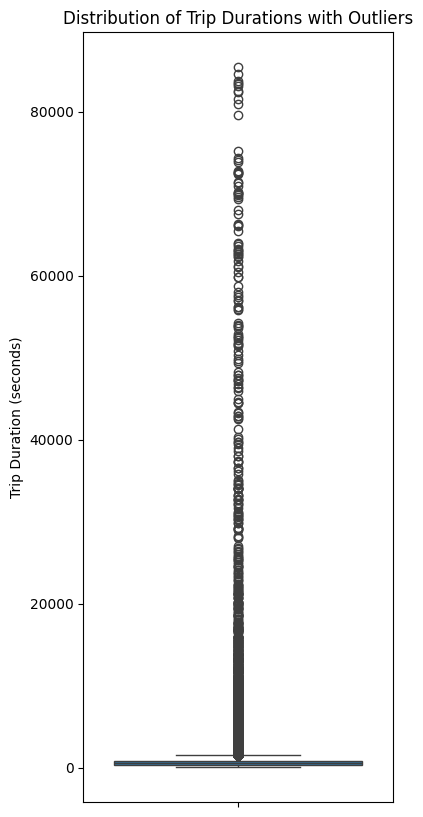

In [59]:
# Check if subscribers are more likely to use bike share for all trips
bike_share_analysis = df.groupby('user_type')['bike_share_for_all_trip'].value_counts(normalize=True) * 100
print("Percentage of users using bike share for all trips by user type:")
print(bike_share_analysis)

# Calculate the haversine distance between start and end stations
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km.
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c
df['distance_km'] = haversine(
    df['start_station_latitude'], df['start_station_longitude'],
    df['end_station_latitude'], df['end_station_longitude']
)
average_distance = df['distance_km'].mean()
print(f"\nThe average distance between start and end stations is: {average_distance:.4f} km")

# Correlation analysis between age, trip duration, and user type
df['user_type_encoded'] = df['user_type'].map({'Subscriber': 1, 'Customer': 0})
correlation_matrix = df[['age', 'duration_sec', 'user_type_encoded']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("\nCorrelation Matrix for Age, Trip Duration, and User Type")
plt.show()

# Boxplot to analyze trip duration distribution and outliers
plt.figure(figsize=(4, 10))
sns.boxplot(data=df, y='duration_sec')
plt.title("Distribution of Trip Durations with Outliers")
plt.ylabel("Trip Duration (seconds)")
plt.show()

<h2><strong>7. Visualization Tasks</strong></h2>
<ul>
    <li>Create a bar chart showing the top 10 most popular start stations.</li>
    <li>Plot a scatter plot of <code>start_station_latitude</code> vs. <code>start_station_longitude</code> to show station locations.</li>
    <li>Generate a stacked bar chart of user types across age groups.</li>
    <li>Visualize the trip duration distribution using a histogram or KDE plot.</li>
</ul>

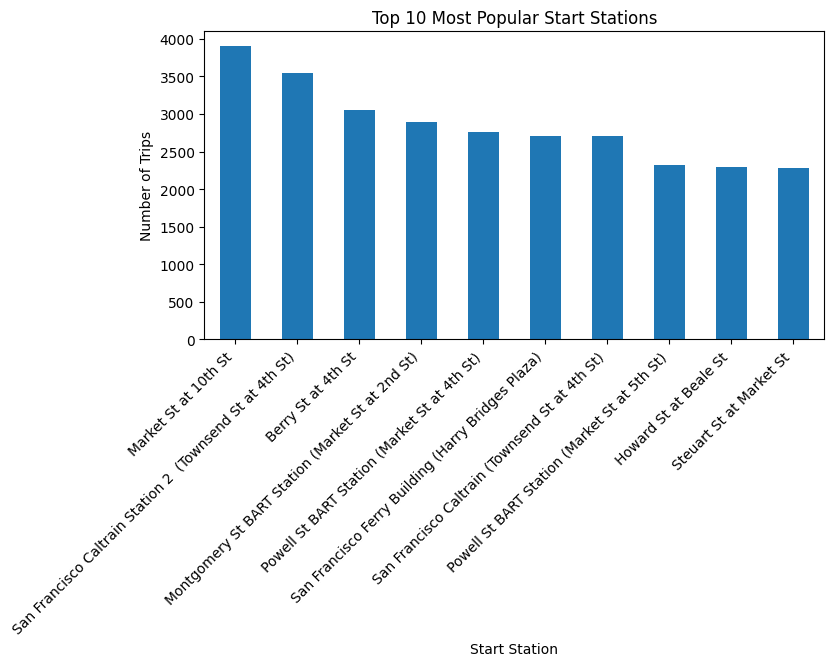

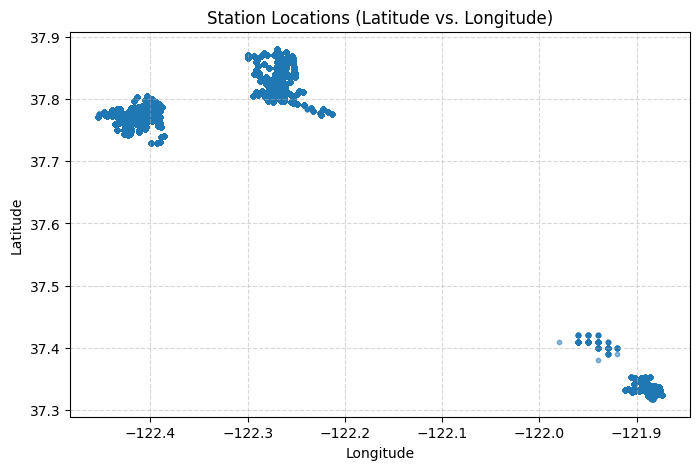

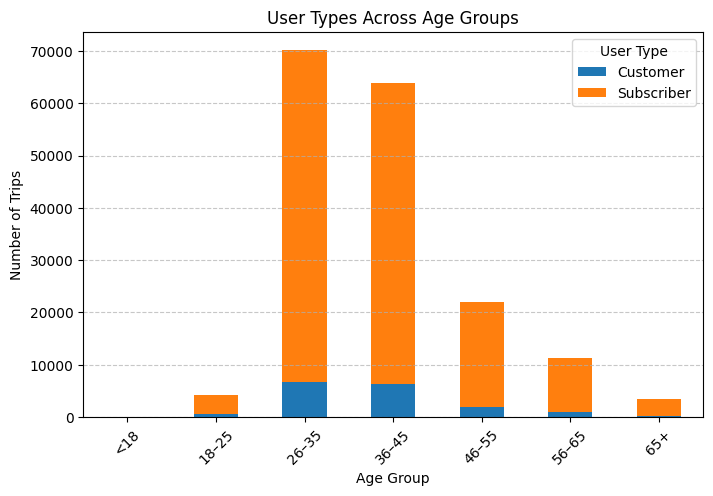

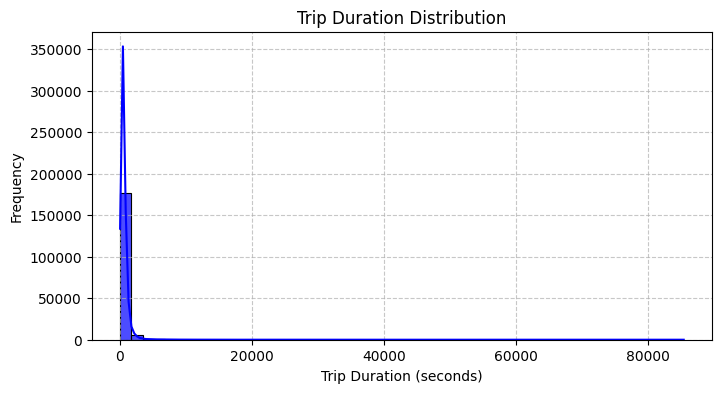

In [61]:
# Bar chart of top 10 most popular start stations
top_10_stations = df['start_station_name'].value_counts().head(10)
plt.figure(figsize=(8, 4))
top_10_stations.plot(kind='bar')
plt.title('Top 10 Most Popular Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

# Scatter plot of station locations (latitude vs. longitude)
plt.figure(figsize=(8, 5))
plt.scatter(df['start_station_longitude'], df['start_station_latitude'], alpha=0.5, s=10)
plt.title('Station Locations (Latitude vs. Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Stacked bar chart of user types across age groups
age_group_user_type = df.groupby(['age_group', 'user_type']).size().unstack()
age_group_user_type.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('User Types Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram and KDE plot for trip duration distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['duration_sec'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h2><strong> Actionable Insights for Pricing Strategy </h2></strong>
<p>Based on the insights gained from the exploratory data analysis with shared bike data, this report provides business research suggestions for a strategic pricing model in order to improve profit and user engagement. </p>

---
<h3><strong>1. Demographics and Usage Patterns</strong></h3>
<ul>
    <li><strong>Gender Distribution:</strong> Male riders dominate the user base, representing approximately 75% of users, followed by female riders (23%) and others (2%). This gender imbalance suggests an opportunity to design targeted marketing campaigns or incentives for underrepresented demographics (e.g., female riders) to expand the user base.</li>
    <li><strong>Age Distribution:</strong> The most active age group is 26–35 years, accounting for the majority of trips. The second active group is the age group of 36–45. Pricing plans targeting these groups, such as loyalty rewards or bundled subscription plans, may further improve their engagement with shared bike usage.</li>
</ul>

<h3><strong>2. Temporal Insights</strong></h3>
<ul>
    <li><strong>Peak Hours:</strong> The highest demand occurs during commuting hours (8 AM and 5 PM). This indicates a heavy reliance on bikes for work-related travel. Dynamic pricing could be introduced during peak hours to manage demand and maximize profit.</li>
    <li><strong>Seasonality:</strong> All trips in the dataset were recorded in February, limiting insights into seasonal trends. Expanding this analysis to include a full year's data may help in designing seasonal pricing adjustments (e.g., discounts in colder months or incentives during the summer).</li>
</ul>

<h3><strong>3. Location-Based Opportunities</strong></h3>
<ul>
    <li><strong>Popular Stations:</strong> High-demand start stations include Market St at 10th St, San Francisco Caltrain Station, and Berry St at 4th St. Consider implementing station-specific pricing, such as higher rental fees at these popular stations to manage demand or offering discounts at underutilized stations to balance usage.</li>
    <li><strong>Short Trip Distances:</strong> The average distance between start and end stations is 1.69 km, suggesting a preference for short trips. A tiered pricing structure based on trip distance or duration could align pricing with usage patterns, such as reduced rates for trips under 2 km to encourage repeat usage.</li>
</ul>

<h3><strong>4. Subscriber Behavior</strong></h3>
<ul>
    <li><strong>Subscription Insights:</strong> Subscribers account for 89% of the user base, with 10.6% indicating they use bike share for all trips. This high adoption rate of subscriptions underscores the need to maintain competitive subscription pricing while exploring value-added services to retain and expand this loyal segment. For example:
        <ul>
            <li>Introduce premium subscription tiers with benefits such as reduced peak-hour charges or free additional minutes per trip.</li>
            <li>Offer referral incentives for subscribers to invite new customers.</li>
        </ul>
    </li>
</ul>

<h3><strong>5. Trip Duration and Outliers</strong></h3>
<ul>
    <li><strong>Outliers in Trip Duration:</strong> Significant outliers exist in trip durations, with some trips exceeding 80,000 seconds (22 hours). While these may represent rare cases or erroneous data, additional checks or capping maximum billable trip durations can avoid billing disputes and improve customer trust.</li>
    <li><strong>Duration Insights:</strong> Customers have longer average trip durations than subscribers, suggesting they may be occasional or exploratory users. Offering promotions or discounted first-time subscriptions to customers could turn them into long-term subscribers.</li>
</ul>

---
<h3><strong>Key Actionable Recommendations</strong></h3>
<ul>
    <li><strong>Dynamic Pricing:</strong>
        <ul>
            <li>Implement surge pricing during peak commuting hours to manage demand and maximize revenue.</li>
            <li>Introduce distance-based or duration-based pricing tiers for flexibility.</li>
        </ul>
    </li>
    <li><strong>Demographic Expansion:</strong>
        <ul>
            <li>Design targeted campaigns to attract underrepresented groups (e.g., female riders and older age groups).</li>
            <li>Introduce discounted or family-friendly pricing plans for broader appeal.</li>
        </ul>
    </li>
    <li><strong>Subscription Optimization:</strong>
        <ul>
            <li>Develop premium subscription tiers to enhance subscriber loyalty and revenue.</li>
            <li>Offer trial periods or discounted first-month subscriptions for customers to encourage conversions.</li>
        </ul>
    </li>
    <li><strong>Operational Efficiency:</strong>
        <ul>
            <li>Incentivize users to pick up bikes from underutilized stations to improve station balance.</li>
            <li>Investigate and cap trip duration outliers to avoid billing disputes.</li>
        </ul>
    </li>
</ul>